<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  PROJECT: ... 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 2 - Exploratory Data Analysis 📌
</div>

## **IMPORT LIBRARY** 🎄

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **EXPLORING DATA** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  BƯỚC 1: Đọc dữ liệu đã được tiền xử lý 🔥
</div>

In [3]:
df = pd.read_csv('../../Data/2425_QC_cleaned.csv')
df.head(10)

,Ad Topic Line,Area Income,Male,Age,Daily Time Spent on Site,Daily Internet Usage,City,Country,Clicked on Ad,Timestamp
0,Cloned 5thgeneration orchestration,61833.90,0,35,68.95,256.09,Wrightburgh,Tunisia,0,2016-03-27 00:53:00
1,Monitored national standardization,68441.85,1,31,80.23,193.77,West Jodi,Nauru,0,2016-04-04 01:39:00
2,Organic bottom-line service-desk,59785.94,0,26,69.47,236.50,Davidton,San Marino,0,2016-03-13 20:35:00
3,Triple-buffered reciprocal time-frame,54806.18,1,29,74.15,245.89,West Terrifurt,Italy,0,2016-10-01 02:31:00
4,Robust logistical utilization,73889.99,0,35,68.37,225.58,South Manuel,Iceland,0,2016-03-06 03:36:00
5,Sharable client-driven software,59761.56,1,23,59.99,226.74,Jamieberg,Norway,0,2016-05-19 14:30:00
6,Enhanced dedicated support,53852.85,0,33,88.91,208.36,Brandonstad,Myanmar,0,2016-01-28 20:59:00
7,Reactive local challenge,24593.33,1,48,66.00,131.76,Port Jefferybury,Australia,1,2016-07-03 01:40:00
8,Configurable coherent function,68862.00,1,30,74.53,221.51,West Colin,Grenada,0,2016-04-18 09:33:00
9,Mandatory homogeneous architecture,55642.32,1,20,69.88,183.82,Ramirezton,Ghana,0,2016-11-07 01:42:00


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  BƯỚC 2: Phân tích các cột dữ liệu số sử dụng Descriptive Statistics 🔥
</div>

Descriptive Statistics cho thấy các đặc điểm của các cột dữ liệu số. Nó cho chúng ta thấy những thông tin như:
- Mean (Giá trị trung bình)
- Median (Giá trị trung vị)
- Mode (Giá trị yếu vị)
- Quantiles (Các phân vị): Quartiles (Tứ phân vị)
- Range và IQR (Interquartile Range)
- Variance (Phương sai) và Standard deviation (Độ lệch chuẩn)
- Coefficient of Variation (Hệ số biến thiên)
- Skewness (Độ lệch)
- Standard Error (Sai số chuẩn)
- Correlation (Hệ số tương quan)

In [4]:
numerical_columns = ['Area Income',	'Age', 'Daily Time Spent on Site', 'Daily Internet Usage']
df_copy = df[numerical_columns].copy()
df_copy.describe()

,Area Income,Age,Daily Time Spent on Site,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,55025.321364,36.018000,65.000200,180.000100
std,13343.228619,8.779907,15.853615,43.902339
min,19373.553750,19.000000,32.600000,104.780000
25%,47031.802500,29.000000,51.360000,138.830000
50%,57012.300000,35.000000,68.215000,183.130000
75%,65470.635000,42.000000,78.547500,218.792500
max,79484.800000,61.000000,91.430000,269.960000


📊 `Trực quan hoá phân phối`

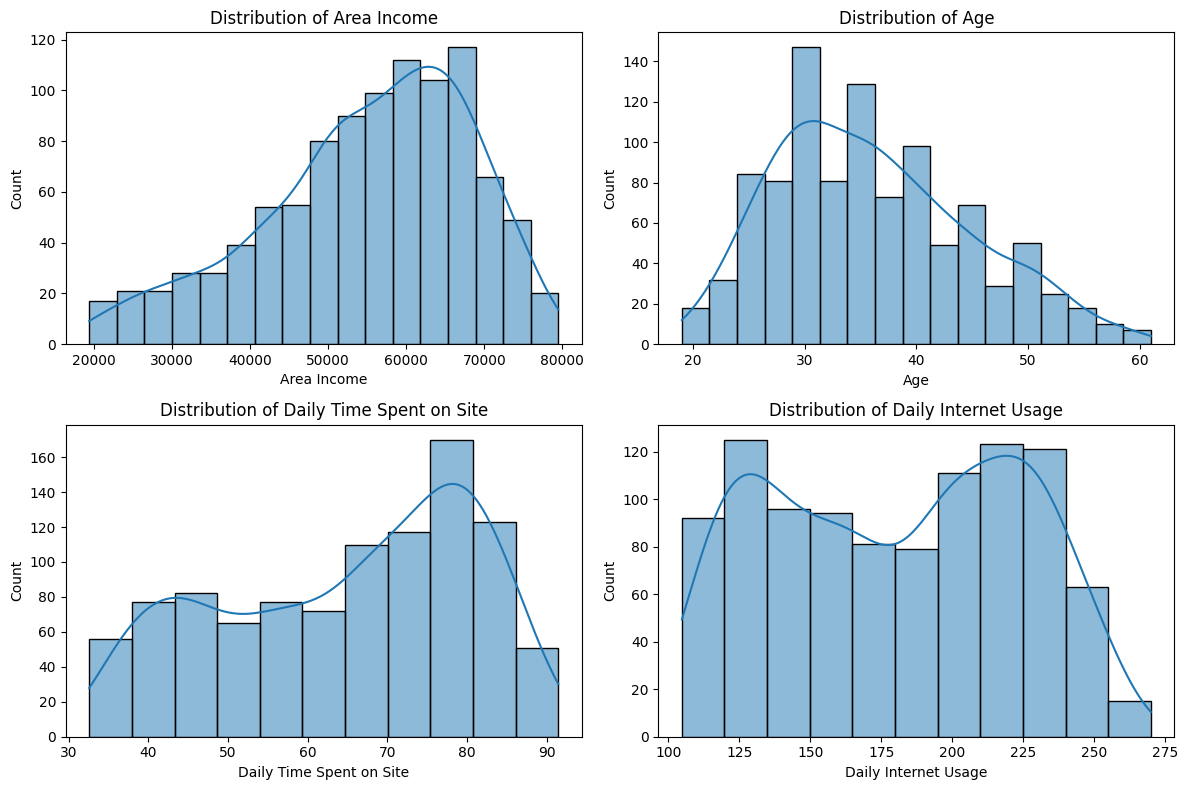

In [5]:
# Create subplots - 2 rows, 2 columns for 4 features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjusting the figure size and grid layout

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical feature in a separate subplot
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Plot histogram and KDE in the i-th subplot
    axes[i].set_title(f'Distribution of {col}')  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()


📏 `Tính toán độ lệch (skewness)`

In [6]:
skewness = df[numerical_columns].skew()
skewness

Area Income                -0.620982
Age                         0.478471
Daily Time Spent on Site   -0.371760
Daily Internet Usage       -0.033537
dtype: float64

📈`NHẬN XÉT:`
- Dựa vào kết quả phân tích ở trên, chúng ta có thể thấy rẳng các giá trị `Daily Time Spent on Site`, `Area Income`, `Age`, có xu hướng phân bố không đồng đều, một ví dụ điển hình là có đuôi dài hơ.

- Trong khi đó, giá trị `Daily Internet Usage` được phân bố khá đồng đều và chỉ lõm ở một phần nhỏ ở giữa biểu đồ. 

- Ngoài ra, kết quả tính toán độ lệch (skewness) cũng cho thấy `Daily Internet Usage` có giá trị độ lệch gần nhất với 0, trong khi `Daily Time Spent on Site`, `Age` và `Area Income` rất xa 0.

### **Quan sát** 💬

Mọi số liệu thống kê đều ổn định và không gặp bất cứ vấn đề gì.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 3: Phân tích đơn biến trong các cột dữ liệu số 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** Phân tích đơn biến Gender (cột Male)

✅  **Mục đích của việc trả lời câu hỏi** So sánh tỉ lệ số lượng giữa nam và nữ

💡  **Cách để tìm ra câu trả lời**: Sử dụng hàm value_counts() của thư viện pandas và sử dụng countplot của seaborn để trực quan hóa dữ liệu

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Sử dụng hàm value_counts() của pandas

In [7]:
df["Male"].value_counts()

Male
0    519
1    481
Name: count, dtype: int64

**Bước 2**: Sử dụng countplot của seaborn

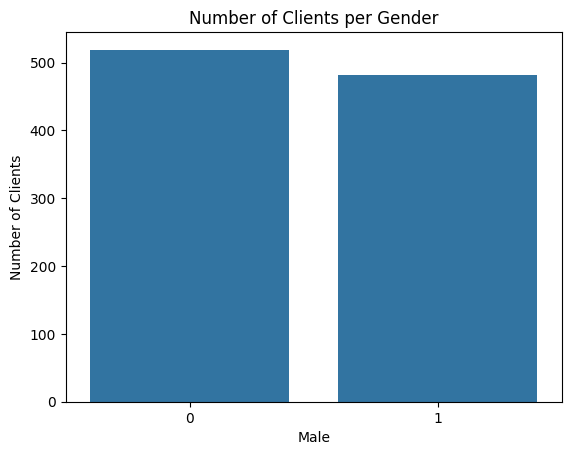

In [8]:
sns.countplot(data=df,x="Male")
plt.title("Number of Clients per Gender")
plt.ylabel("Number of Clients")
plt.show()

### **Quan sát** 💬
- Số lượng nam và nữ xấp xỉ tương đương với nhau

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** Phân tích đơn biến Age

✅  **Mục đích của việc trả lời câu hỏi** Nhằm phân tích lượng người dùng theo từng độ tuổi;

💡  **Cách để tìm ra câu trả lời**: Sử dụng hàm describe() và sử dụng historgram

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Sử dụng hàm describe()

In [9]:
df["Age"].describe()

count    1000.000000
mean       36.018000
std         8.779907
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64

**Bước 2**: Sử dụng histogram

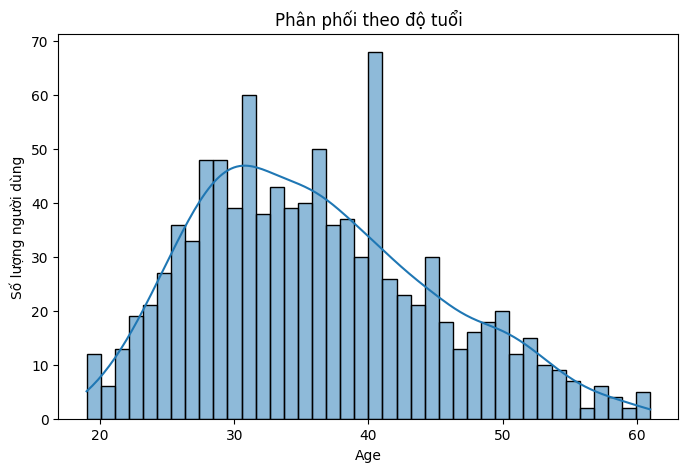

In [10]:
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="Age",bins=40, kde=True).set(title="Phân phối theo độ tuổi",ylabel="Số lượng người dùng")
plt.show()

### **Quan sát** 💬
- Độ tuổi trung bình trong mẫu quan sát là 36.
- Dựa theo biểu đồ histogram, cột "Age" không theo phân phối chuẩn do bị lệch phải.
- Biểu đồ cho thấy một số nhóm tuổi phổ biến, đặc biệt là từ 30 đến 40 tuổi.

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 5** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 6** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 4: Mô tả mối tương quan giữa các cột trong tập dữ liệu 🔥
</div>

Bây giờ chúng ta sẽ xem xét các cột dữ liệu có sẵn trong tập dữ liệu để xác định và phân tích mối quan hệ giữa chúng. Sau đó là xác định những cột dữ liệu nào trong tập dữ liệu đóng góp đáng kể cho mục tiêu của chúng ta.  

Bằng cách tính toán và trực quan hóa, Python cho phép chúng ta tạo ma trận tương quan, đây là bảng biểu thị các hệ số tương quan giữa các biến khác nhau.

### **Ma trận tương quan**

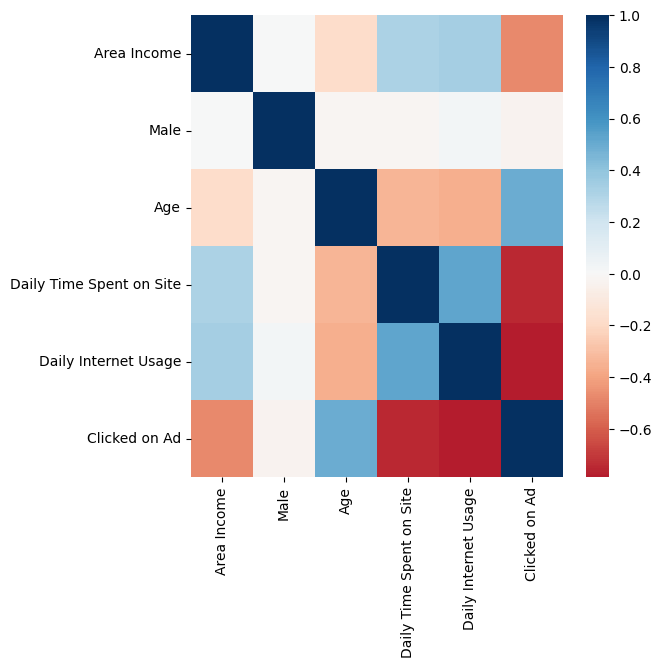

In [11]:
df_copy = df.select_dtypes(include='number')
# Plot a correlation matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

### **Bảng hệ số tương quan**

In [12]:
df_copy.corr()

,Area Income,Male,Age,Daily Time Spent on Site,Daily Internet Usage,Clicked on Ad
Area Income,1.000000,0.002524,-0.184454,0.312198,0.339280,-0.476905
Male,0.002524,1.000000,-0.022045,-0.018951,0.028012,-0.038027
Age,-0.184454,-0.022045,1.000000,-0.333021,-0.367484,0.493874
Daily Time Spent on Site,0.312198,-0.018951,-0.333021,1.000000,0.518658,-0.748117
Daily Internet Usage,0.339280,0.028012,-0.367484,0.518658,1.000000,-0.786539
Clicked on Ad,-0.476905,-0.038027,0.493874,-0.748117,-0.786539,1.000000


### **Quan sát** 💬
- Có một vài cột dữ liệu có mỗi tương quan khá mạnh với những cột khác, điển hình như là `Clicked on Ad`, Daily `Time Spent on Site`, `Daily Internet Usage`.
- Các cột khác như `Clicked on Ad`, `Area Income`, `Age`, có hệ số tương quan ở mức vừa phải.
- Còn lại các cột khác thì có hệ số tương quan khá yếu.

there are some features that seem to have strong correlation with each other, namely `Like`, `View`, `Charted-duration`, `Most view per day`. Other features, in constrast, correlate quite weak.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 5: Phân tích hai biến trong tập dữ liệu 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** Phân tích 2 biến Area Income và Clicked on Ad

✅  **Mục đích của việc trả lời câu hỏi** Phân tích sự tương quan giữa thu nhập với khả năng nhấp vào quảng cáo

💡  **Cách để tìm ra câu trả lời**: Sử dụng heatmap để so sánh sự tương quan và boxplot để trực quan độ thu nhập và khả năng nhấp vào quảng cáo

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Sử dụng heatmap để tìm sự tương quan của 2 cột Area Income và Clicked on Ad

               Area Income  Clicked on Ad
Area Income       1.000000      -0.476905
Clicked on Ad    -0.476905       1.000000


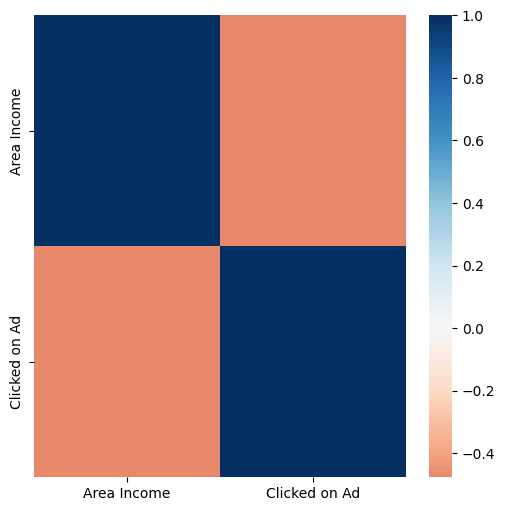

In [13]:
df_tmp = df[["Area Income","Clicked on Ad"]].corr()
print(df_tmp)
# Plot a correlation matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_tmp, cmap='RdBu', center=0,ax=ax)
plt.show()

**Bước 2**: Sử dụng bloxplot

<Axes: xlabel='Clicked on Ad', ylabel='Area Income'>

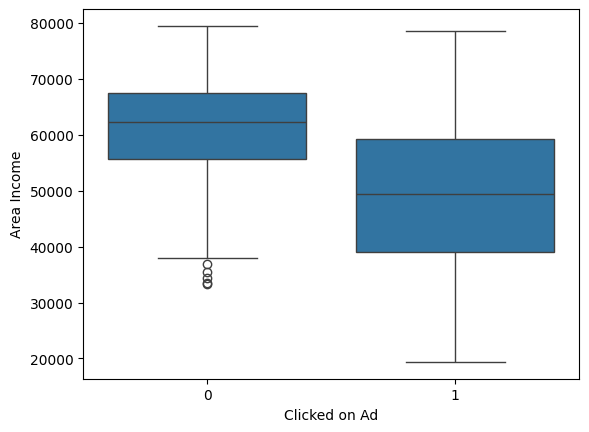

In [14]:
sns.boxplot(data=df, x="Clicked on Ad", y="Area Income")


### **Quan sát** 💬
- Khi quan sát độ tương quan giữa 2 cột Area Income và Clicked on Ad thì ta có thể thấy chúng có độ tương quan trung bình, nghĩa là thu nhập không hẳn là yếu tố chính để xác định xem người dùng có nhấp vào quảng cáo hay không.
- Khi quan sát boxplot, ta có thể thấy những người không nhấp vào quảng cáo, mức thu nhập trung bình của khu vực cao hơn so với những người nhấp vào quảng cáo.
- Nhóm không nhấp vào quảng cáo có khoảng thu nhập hẹp hơn (phần giữa của hộp nhỏ hơn), cho thấy sự tập trung của thu nhập trong khoảng 55,000 đến 70,000.
- Nhóm nhấp vào quảng cáo có phân phối rộng hơn, với một khoảng biến động thu nhập lớn hơn, trải từ khoảng 20,000 đến gần 80,000.
- Vì vậy ta có thể thấy rằng những người có mức thu nhập cao sẽ có ít khả năng nhấp vào quảng cáo hơn.

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** Phân tích 2 biến Gender (cột Male) và Clicked on Ad

✅  **Mục đích của việc trả lời câu hỏi** Phân tích khả năng nhấp vào quảng cáo đối với mỗi giới tính 

💡  **Cách để tìm ra câu trả lời**: Sử dụng heatmap để so sánh sự tương quan và barplot để trực quan độ thu nhập và khả năng nhấp vào quảng cáo

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Sử dụng heatmap để tìm sự tương quan của 2 cột Male và Clicked on Ad

                   Male  Clicked on Ad
Male           1.000000      -0.038027
Clicked on Ad -0.038027       1.000000


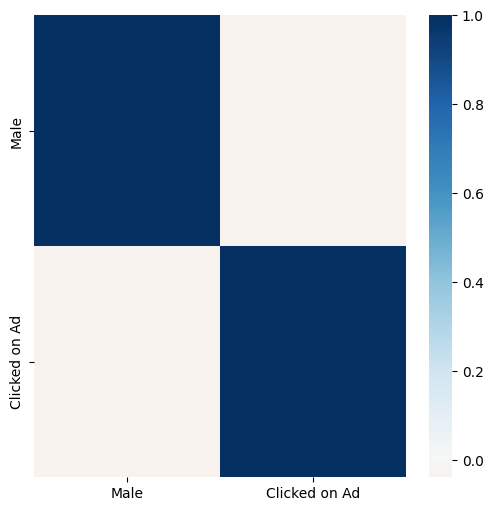

In [15]:
df_tmp = df[["Male","Clicked on Ad"]].corr()
print(df_tmp)
# Plot a correlation matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_tmp, cmap='RdBu', center=0,ax=ax)
plt.show()

**Bước 2**: Sử dụng barplot

<Axes: xlabel='Male', ylabel='count'>

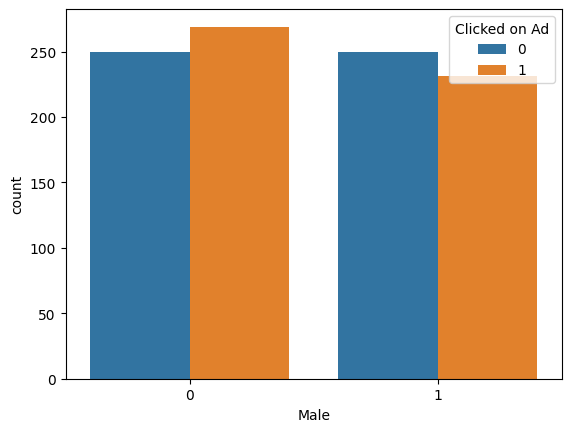

In [16]:
sns.countplot(data=df, x="Male", hue="Clicked on Ad")
# pd.crosstab(df['Male'], df['Clicked on Ad']).plot(kind='bar', stacked=True)


### **Quan sát** 💬
- Quan sát độ tương quan giữa cột Male và Clicked on Ad, ta có thể thấy sự tương quan giữa chúng gần như bằng 0. Điều đó có nghĩa là giới tính không quyết định khả năng nhấp vào quảng cáo.
- Khi nhìn vào barplot, ta cũng có thể thấy số lượng giữa việc nhấp và không nhấp vào quảng cáo đối với nam và nữ xấp xỉ không khác nhau.
=> Giới tính không quyết định khả năng nhấp vào quảng cáo

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 5** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 6** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 6: Phân tích đa biến trong tập dữ liệu 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** Phân tích 3 biến Age, Area Income và Clicked on Ad

✅  **Mục đích của việc trả lời câu hỏi** Phân tích sự liên quan giữa độ tuổi và thu nhập đối với khả năng nhấp vào quảng cáo của người dùng

💡  **Cách để tìm ra câu trả lời**: Sử dụng scatterplot và heatmap để thể hiện sự tương quan giữa 3 biến

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Sử dụng scatterplot

<Axes: xlabel='Age', ylabel='Area Income'>

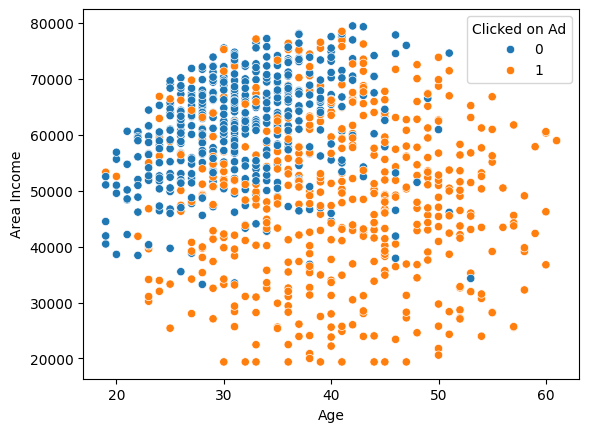

In [17]:
sns.scatterplot(data=df, x='Age', y='Area Income', hue='Clicked on Ad')

**Bước 2**: Sử dụng heatmap để mô tả sự tương quan của 3 biến dữ liệu

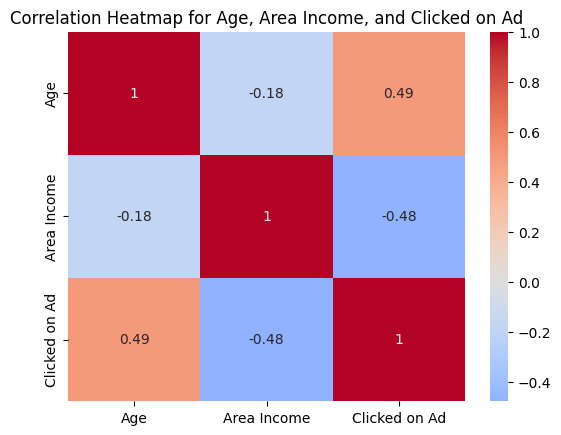

In [18]:
corr_matrix = df[['Age', 'Area Income', 'Clicked on Ad']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Age, Area Income, and Clicked on Ad')
plt.show()

### **Quan sát** 💬
- Dựa vào biểu đồ scatter, ta có thể thấy những người có thu nhập cao (>50000) thường sẽ không nhấp vào quảng cáo, đặc biệt là những người có thu nhập cao và nằm trong độ tuổi từ khoảng 20 cho tới 40.
- Ngoài ra, độ tuổi mà người dùng nhấp vào quảng cáo dao động từ 30 tới 50 tuổi. Mức thu nhập của người nhấp vào quảng cáo phân bố cũng khá đều, nghĩa là người nhấp vào quảng cáo sẽ phụ thuộc vào độ tuổi nhiều hơn.
- Quan sát biểu đồ heatmap thể hiện sự tương quan dữ liệu, cả Age và Area Income đều có sự tương quan ở mức tương đối đối với Clicked on Ad, Age lại nhỉnh hơn Area Income.

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...